In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#from analysis import download_database
#download_database()

In [5]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


In [49]:
group_experiments.all_types

['Habituation', 'Initial Touch']

In [57]:
a = group_experiments.get_experiments_per_types('Initial Touch')
b = group_experiments.get_experiments_per_types('Habituation')


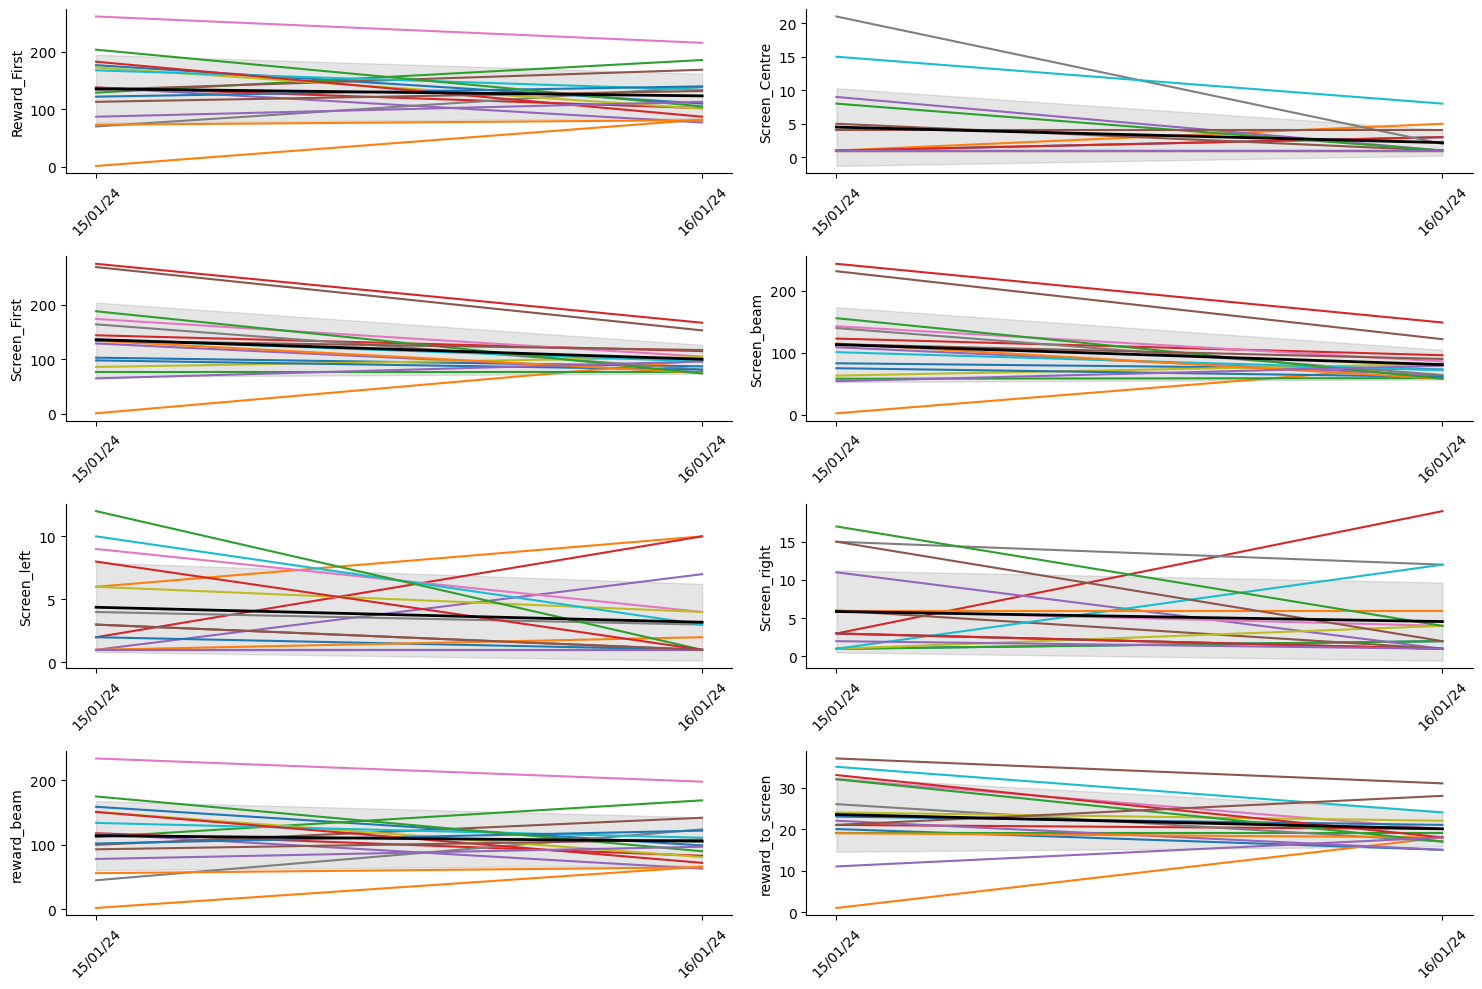

In [58]:
from plotting import *
display_variables(b)

/home/pierre/github/equipsy/results/plotting.py:216: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


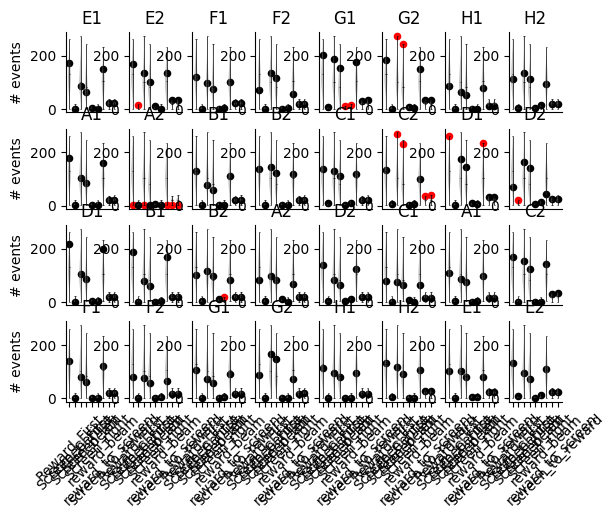

In [69]:
display_group_experiments(b)